<a href="https://colab.research.google.com/github/viviakemik/machine-learning/blob/main/generalized-linear-model/training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Book: 

* Hands-on Machine Learning with Scikit-learn & TensorFlow

https://www.amazon.com.br/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646

2. Github: https://github.com/ageron/handson-ml2

3. Courses: 
* https://www.coursera.org/learn/machine-learning
* https://www.coursera.org/learn/ml-regression/home
* https://www.coursera.org/learn/ml-classification/home
* https://learning.edx.org/course/course-v1:UCSanDiegoX+DSE220x+1T2021/home

4. Youtube:
* https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

Multicollinearity with Linear Methods

https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a

https://www.youtube.com/watch?v=NYtwyvyvDEk

# **Linear regression**

https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html

to train a Linear Regression model, you need to find the value of θ that minimizes the RMSE.

Source: https://www.coursera.org/learn/machine-learning

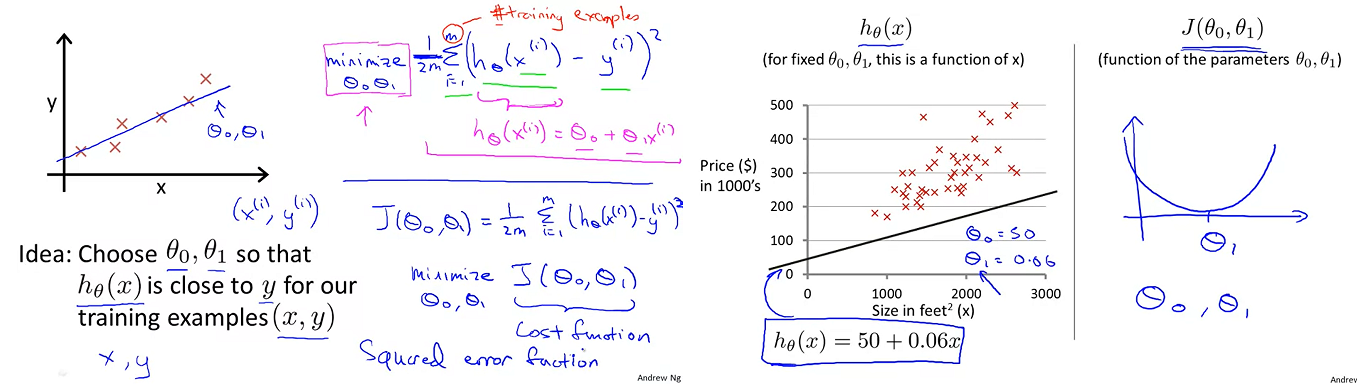

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


<class 'numpy.ndarray'>


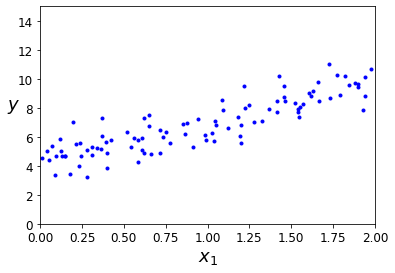

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
#save_fig("generated_data_plot")
plt.show()

## **Normal Equation**

there is a closed-form solution (mathematical equation that gives the result directly)

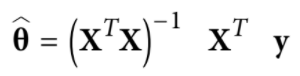

Source: https://www.coursera.org/learn/ml-regression/home

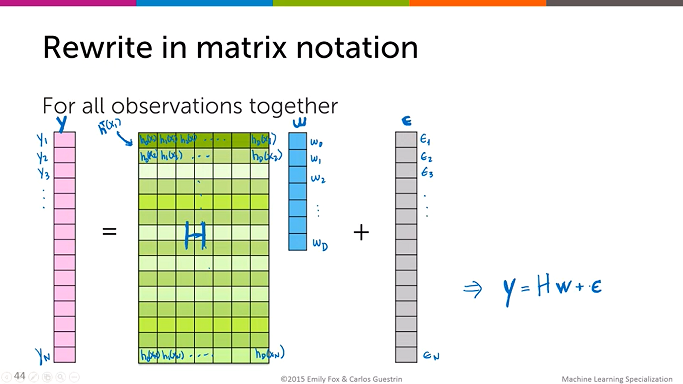

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

We would have hoped for $θ_{0} = 4$ and $θ_{1} = 3$ instead of $θ_{0} = 4.215$ and $θ_{1} = 2.770$. Close enough, but the noise made it impossible to recover the exact parameters of the original function.

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

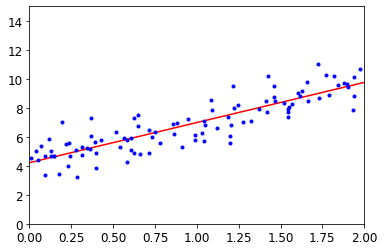

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

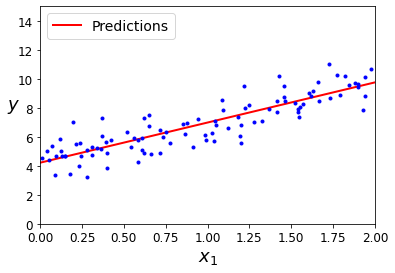

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
#save_fig("linear_model_predictions_plot")
plt.show()

Linear regression using Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”), which you could call directly:

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])


This function computes $\mathbf θ={X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the pseudoinverse of $\mathbf{X}$ (specifically the Moore-Penrose inverse). The pseudoinverse itself is computed using SVD (This approach is more efficient than computing the Normal Equation, because the computational complexity $X^T X$ is about $O(n^3)$)

You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

Both the Normal Equation ($O(n^2)$) and the SVD ($O(n^3)$) approach get very slow when the number of features grows large (e.g., 100,000).

## **Gradient Descent**

Source: https://www.coursera.org/learn/machine-learning


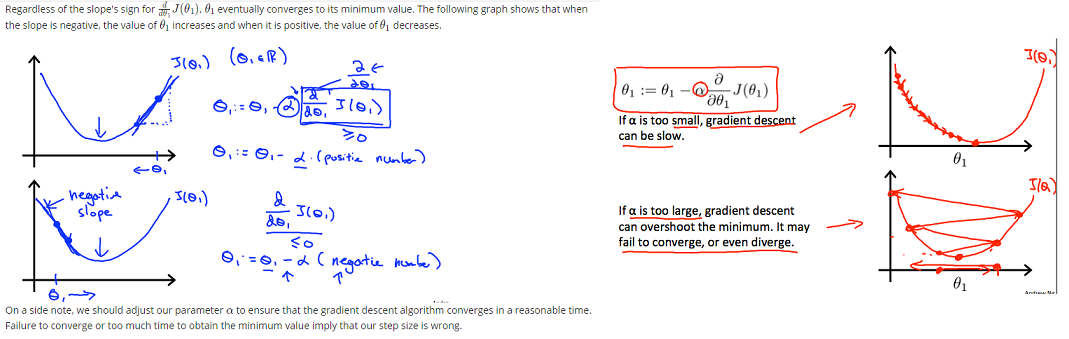

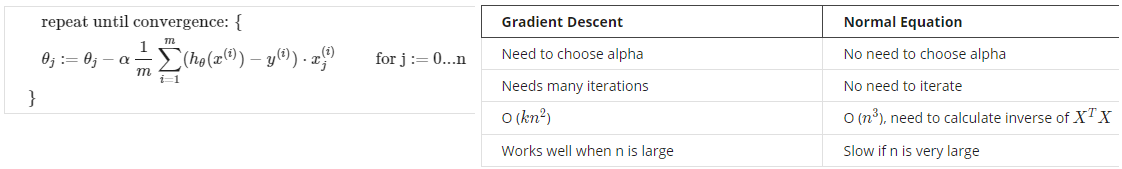

When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.

Fortunately, since the cost function is convex in the case of Linear Regression,

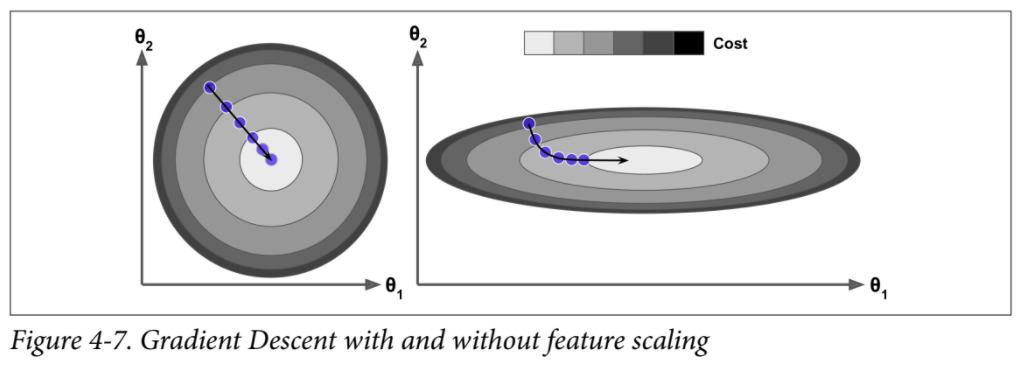

### **Batch Gradient Descent**

you need to calculate how much the cost function will change if you change θj
just a little bit (partial derivative of the cost function)

Source: https://www.amazon.com.br/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646

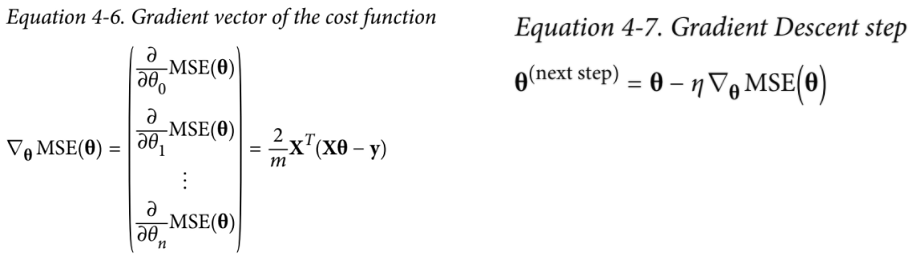



In [ ]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

Notice that this formula involves calculations over the full training
set X, at each Gradient Descent step! This is why the algorithm is
called Batch Gradient Descent: it uses the whole batch of training
data at every step.

training a Linear Regression model
**when there are hundreds of thousands of features**
is much faster using Gradient
Descent than using the Normal Equation or SVD decomposition.

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

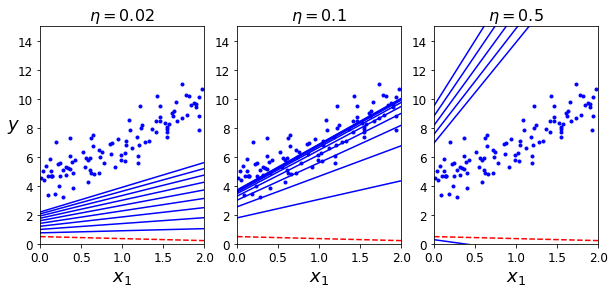

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

#save_fig("gradient_descent_plot")
plt.show()

* On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. 

* In the middle, the learning rate looks pretty good: in
just a few iterations, it has already converged to the solution.

* learning rate is too high: the algorithm diverges, jumping all over the place


* To find a good learning rate, you can use **grid search.**

* A simple solution is to **set a very large number of iterations** but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a **tiny number ε **(called the tolerance)

Source: https://www.coursera.org/learn/machine-learning

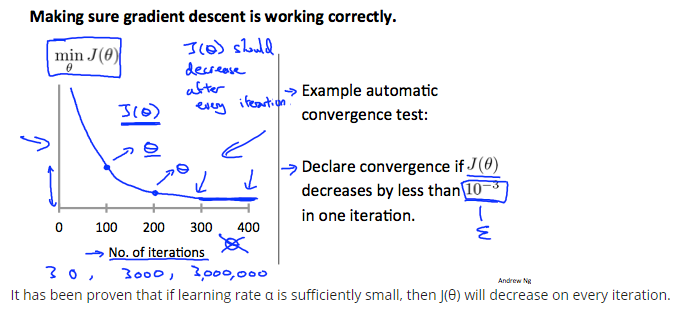

### **Stochastic Gradient Descent**

* The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. 

* Stochastic Gradient Descent just picks a **random instance in the training set** at every step and computes the gradients based only on that single instance.

* So once the algorithm SGD stops, the final parameter values are good, but not optimal => to find global minimum, gradually reduce the learning rate.


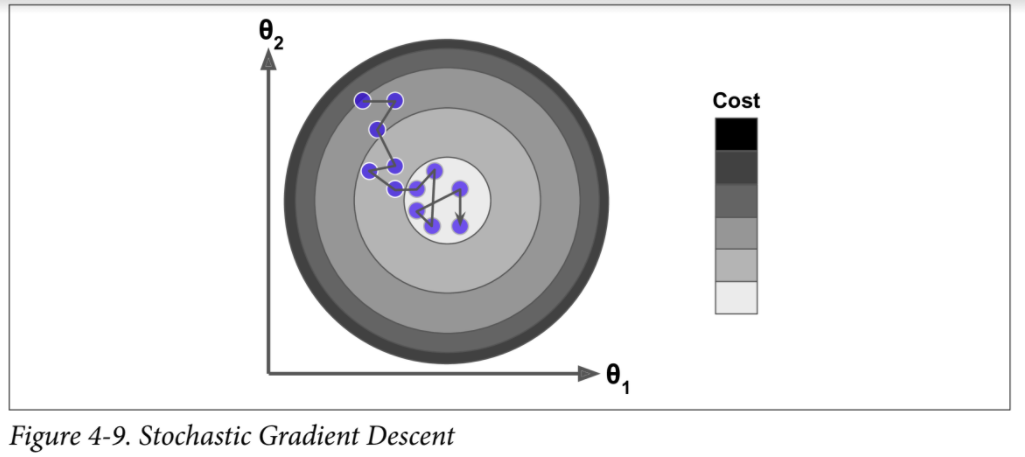

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

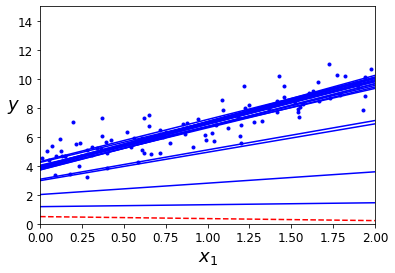

In [ ]:
#This code implements Stochastic Gradient Descent using a simple learning schedule:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
#save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

The following code runs for maximum 1000 epochs (max_iter=1000) or until the loss drops
by less than 1e-3 during one epoch (tol=1e-3), starting with a learning rate of 0.1
(eta0=0.1),

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

### **Mini-batch gradient descent**

Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [ ]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

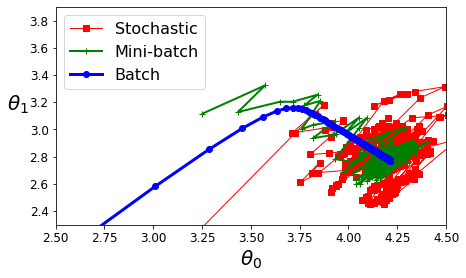

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
#save_fig("gradient_descent_paths_plot")
plt.show()

* Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. 

* However, don’t forget that **Batch GD takes a lot of time to take each step**, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.


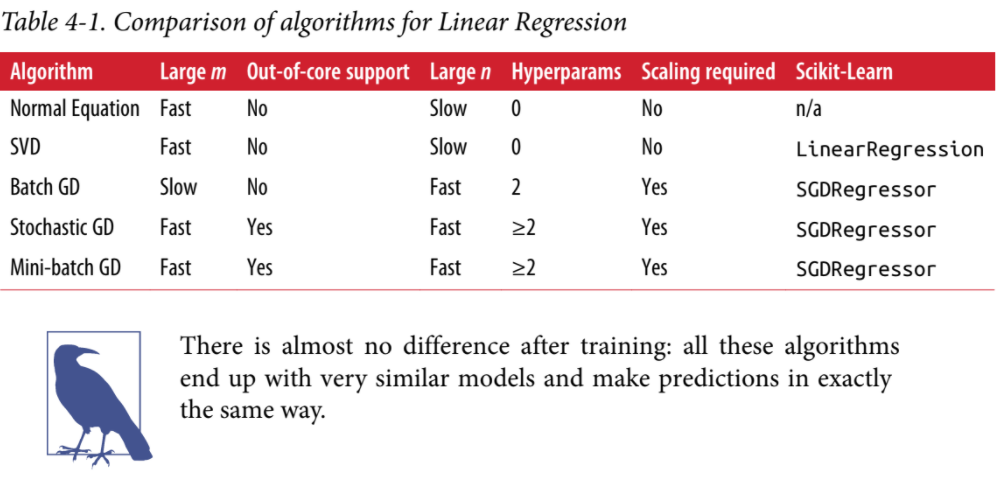

# **Polynomial Regression**

What if your data is actually more complex than a simple straight line?

A simple way to do this is to
add powers of each feature as new features

Beware of the combinatorial explosion of the number of features!


https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/

Source: https://www.coursera.org/learn/ml-regression/home

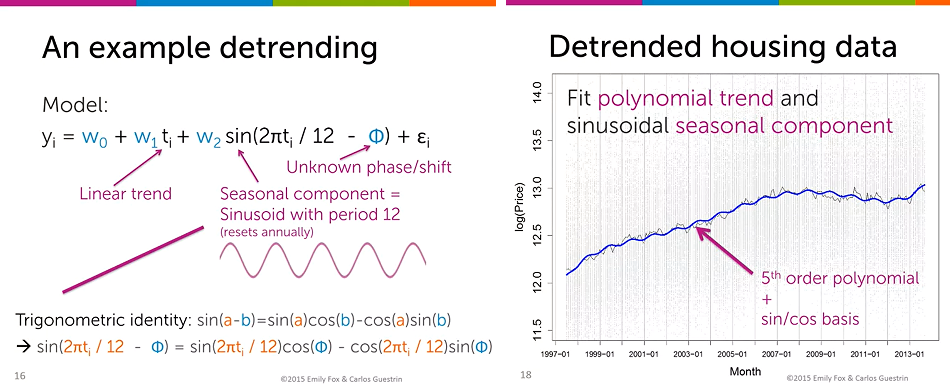

In [ ]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

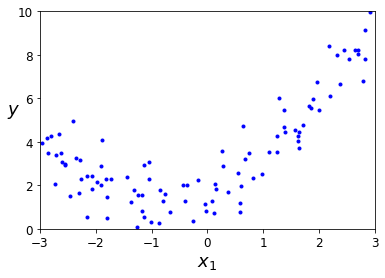

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_data_plot")
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
nomialFeatures class to transform our training data, adding the square (2nd-degree
polynomial) of each feature in the training set as new features (in this case there is
just one feature):

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a LinearRegression model to this extended training data

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

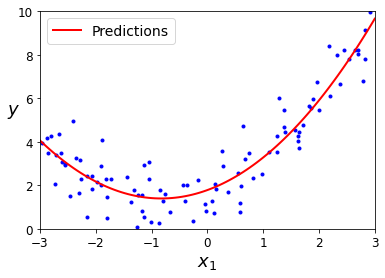

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()

## **Learning Curves**

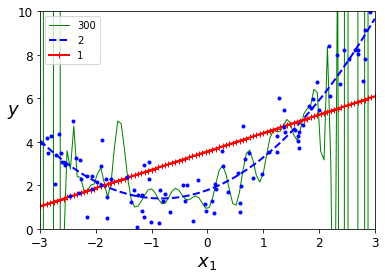

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("high_degree_polynomials_plot")
plt.show()

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression.

Of course, this high-degree Polynomial Regression model is severely **overfitting the training data**

How can you tell
that your model is overfitting or underfitting the data?



1.   **cross-validation** to get an estimate of a model’s generalization
performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting.
2.   Another way is to look at the **learning curves**: these are plots of the model’s performance on the training set and the validation set as a function of the training set size
(or the training iteration). To generate the plots, simply train the model several times
on different sized subsets of the training set.

https://machinelearningmastery.com/overfitting-machine-learning-models/


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

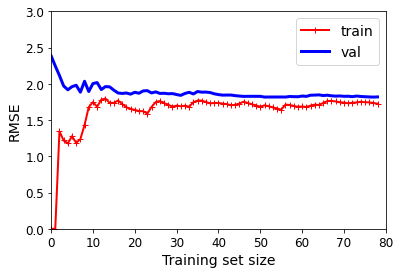

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
#save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

* The error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse. it becomes impossible for the model to fit the training data perfectly, both because the **data is noisy and because it is not linear at all.**

* When the model is trained on very few training instances, it is incapable of generalizing properly, which is **why the validation error is initially quite big.**

* In this Figure, the model is underfitting because the error is too high and the lines are closer

* If your model is **underfitting the training data, adding more training examples will not help**. You need to use a more complex model
or come up with better features.

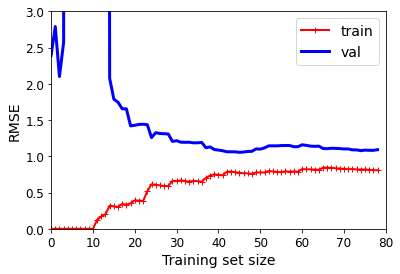

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
#save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

1.   The error on the training data is much lower than with the Linear Regression
model.
2.   There is a **gap between the curves**. This means that the model **performs significantly better on the training data** than on the validation data, which is the hallmark of an **overfitting** model.

One way to improve an **overfitting** model is to **feed it more training**
data until the validation error reaches the training error.

**Bias vs Variance**

https://www.youtube.com/watch?v=EuBBz3bI-aA



### **Examples of underfitting**

An example of this is provided below and is common when the model does not have a suitable capacity for the complexity of the dataset.

Sources:

https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5

https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/


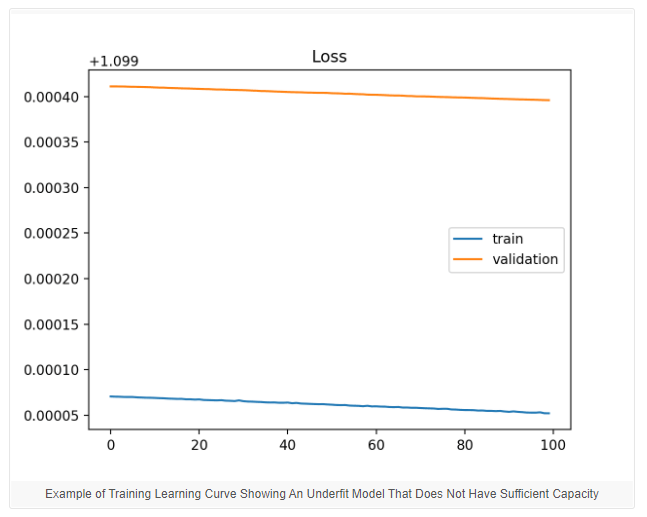








This indicates that the model is capable of further learning and possible further improvements and that the training process was halted prematurely.

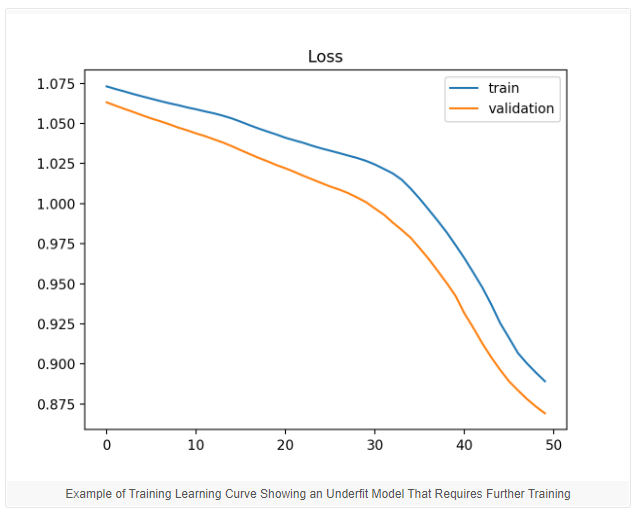

Learning curve of an overfit model has a **very low training loss** at the beginning which gradually increases very slightly upon adding training examples and doesn’t flatten.

Learning curve of an overfit model has a high validation loss at the beginning which gradually decreases upon adding training examples and **doesn’t flatten**, indicating **addition of more training examples can improve** the model performance on unseen data.

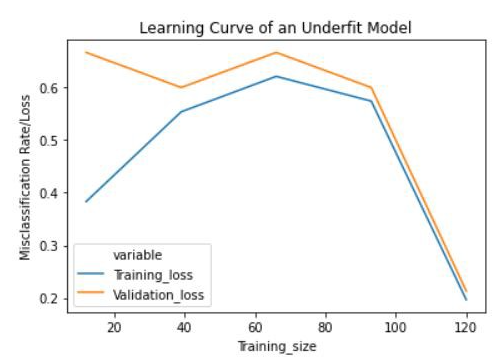

### **Examples of overfitting**

The plot of training loss continues to decrease with experience.
The plot of validation loss decreases to a point and begins increasing again.

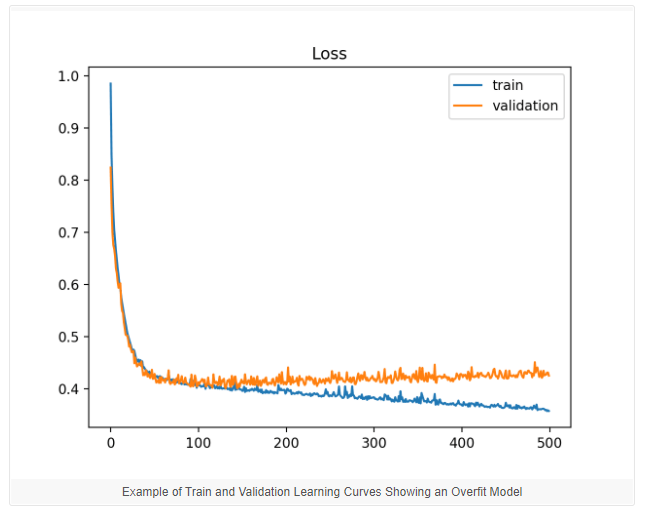

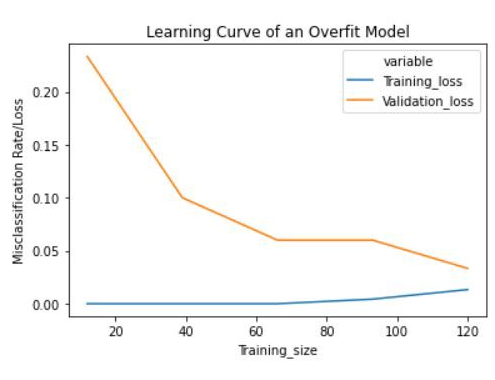

### **Examples of good fit**

A good fit is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values.


*   The plot of training loss decreases to a point of stability.
*   The plot of validation loss decreases to a point of stability and has a small gap with the training loss.


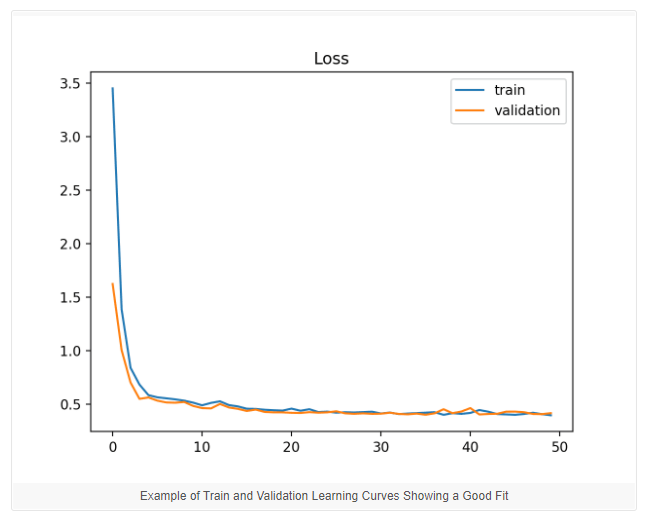


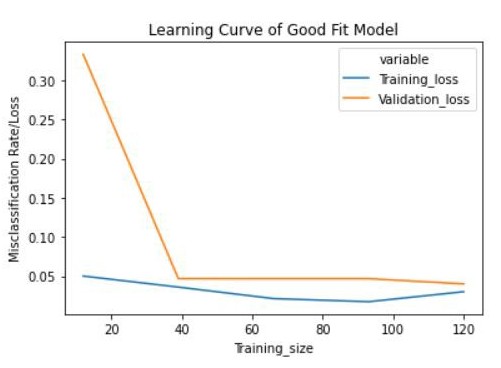

### **Unrepresentative Train Dataset**

An unrepresentative training dataset means that the training dataset does not provide sufficient information to learn the problem, relative to the validation dataset used to evaluate it.

This may occur if the training dataset has too few examples as compared to the validation dataset.

https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

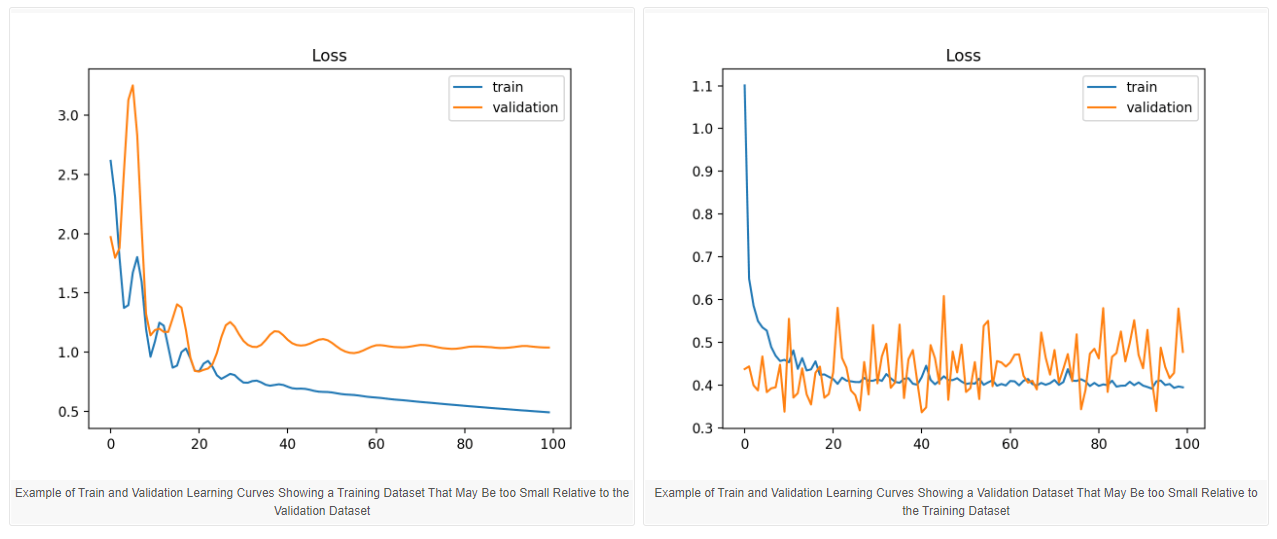

It may also be identified by a validation loss that is lower than the training loss. In this case, it indicates that the validation dataset may be easier for the model to predict than the training dataset.

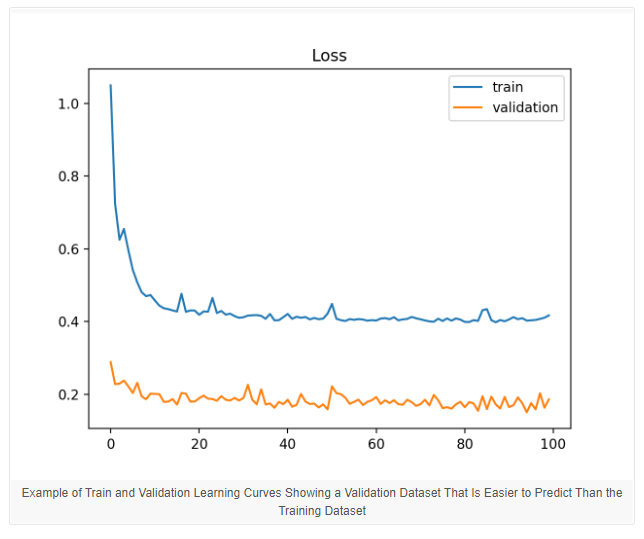

# **Regularized models**

a good way to reduce overfitting is to regularize the
model

## **Ridge Regression**
is a regularized version of Linear Regression: a regularization term equal to $α\sum_{i=1}^{n}\theta_{i}^{2}$ is added to the cost function. This forces the learning algorithm to not only fit the data but also **keep the model
weights as small as possible**.

* If α = 0 then Ridge Regression is just Linear Regression - Low Bias, High Variance

* If α is very large, then all weights end up very close to zero - High bias, Low Variance

You need to scale data before performing Regularization

Source: https://www.coursera.org/learn/ml-regression/home

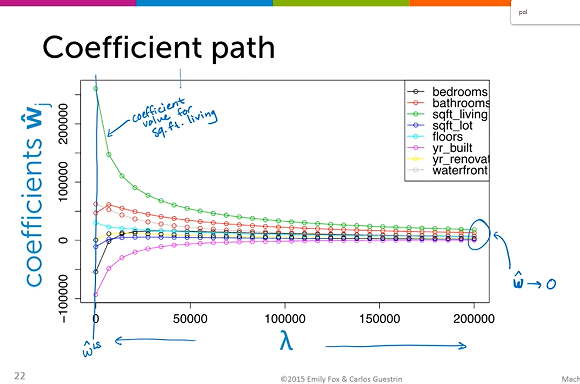



Source: https://www.youtube.com/watch?v=Q81RR3yKn30

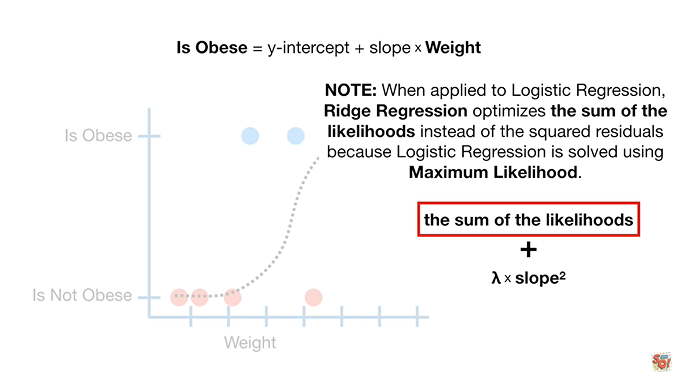

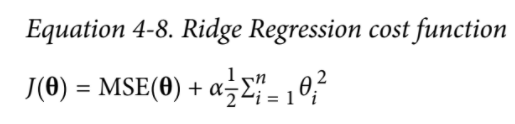

Normal Equation

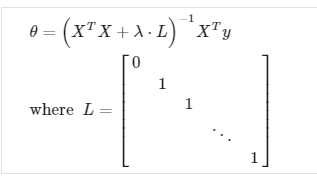

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

perform Ridge Regression with Scikit-Learn using a closed-form solution (parameter cholesky)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [ ]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

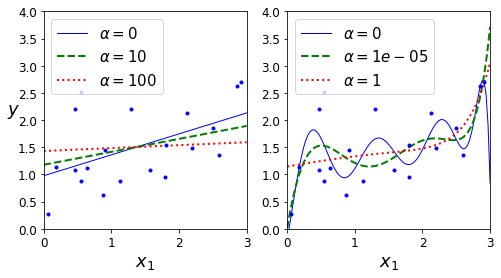

In [ ]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

#save_fig("ridge_regression_plot")
plt.show()

* On the left, plain Ridge models are used, leading to linear predictions. 
* On the right, the data is first expanded using PolynomialFeatures(degree=10) and then used Ridge


The penalty hyperparameter sets the type of regularization term to use (l2 = Ridge)

In [ ]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## **Lasso Regression**

it adds a regularization term to the cost function, but it uses the l1 norm of the weight vector

$J(θ) = MSE(θ) + α\sum_{i=1}^{n}|\theta_{i}|$

it tends to completely **eliminate the weights** of the least important features (i.e., set them to zero, ie, automatically **performs feature selection** and outputs a
sparse model).

https://www.youtube.com/watch?v=NGf0voTMlcs

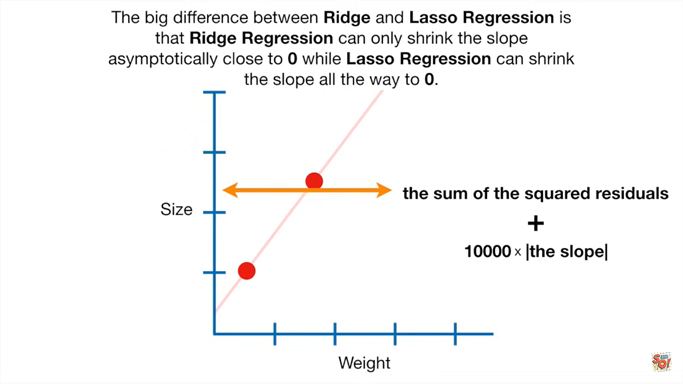

Source: https://www.coursera.org/learn/ml-regression/home


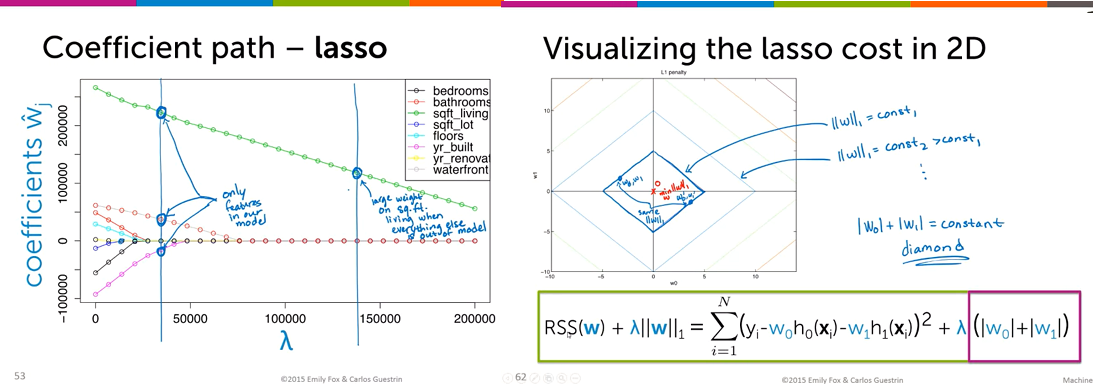

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


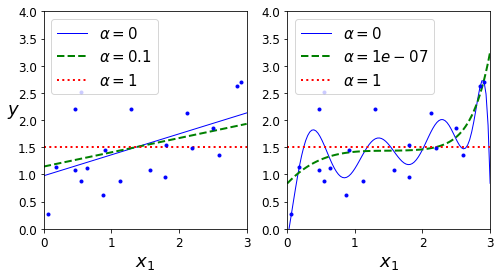

In [ ]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

#save_fig("lasso_regression_plot")
plt.show()

all the weights for the high-degree polynomial features are equal to zero (dashed line on the right figure)


Here is a small Scikit-Learn example using the Lasso class. Note that you could
instead use an SGDRegressor(penalty="l1").

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## **Elastic Net**

The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. 

* When r = 0, Elastic Net is equivalent to Ridge
Regression, and 
* when r = 1, it is equivalent to Lasso Regression

$J(θ) = MSE(θ) + rα\sum_{i=1}^{n}|θ{i}| + 1 − r/2 α\sum_{i=1}^{n}θ{i}^{2}$


* It is almost always preferable to have at least a little bit of
regularization, so generally you should avoid plain Linear Regression.

* Ridge is a good
default, but if you suspect that only a few features are actually useful, you should prefer Elastic Net (instead of Lasso)

https://www.youtube.com/watch?v=1dKRdX9bfIo

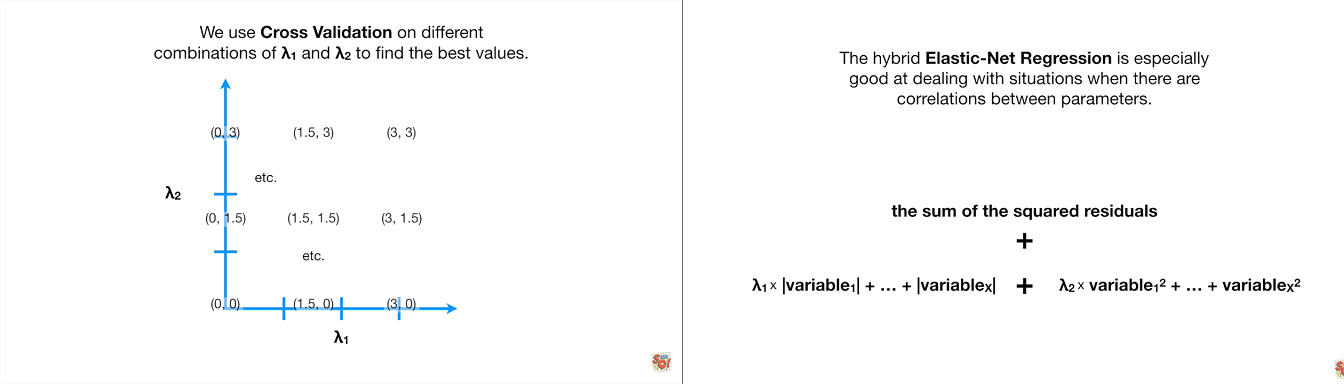

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## **Early Stopping**

A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum.

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

Note that with warm_start=True, when the fit() method is called, it just continues
training where it left off instead of restarting from scratch.

In [ ]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

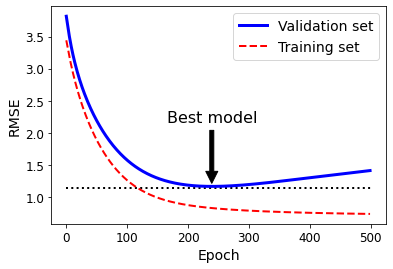

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
#save_fig("early_stopping_plot")
plt.show()

In [ ]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

**Cross-validation (train-validation-test)**

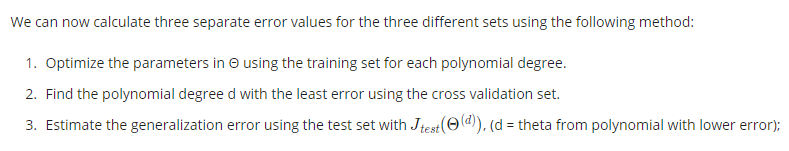

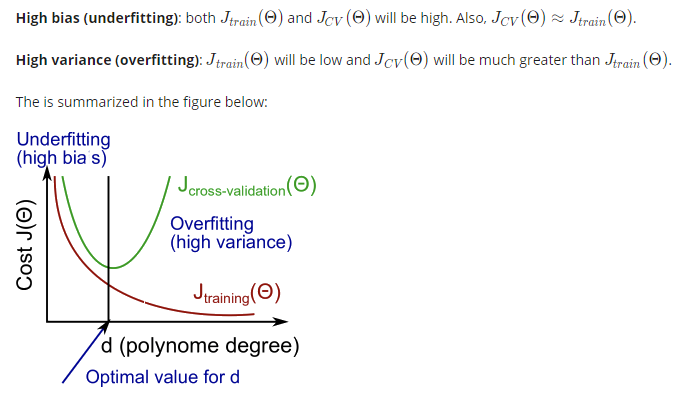

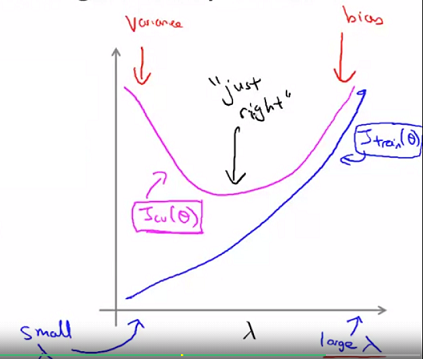

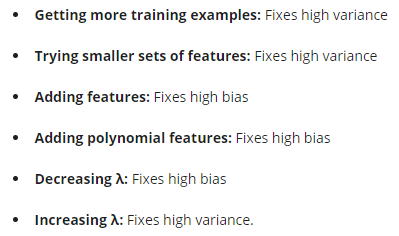

# **Logistic regression**
(https://machinelearningmastery.com/logistic-regression-for-machine-learning/)

* Logistic regression is a **linear method**, but the **predictions are transformed using the logistic function**. 

* It is commonly used to estimate the probability that an instance belongs to a particular class

* Logistic Regression model **computes a weighted sum of the input features (plus a bias term)**, but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result

$p = h_{θ}(x) = σ(x^{T}θ)$

* The logistic—noted σ(·)—is a sigmoid function (0 and 1)
* y = 0 if p (ou σ(t)) < 0.5 => $x^{T}θ < 0$
* y = 1 if p (ou σ(t)) ≥ 0.5 => $x^{T}θ >= 0$

Source: https://www.coursera.org/learn/ml-classification/home

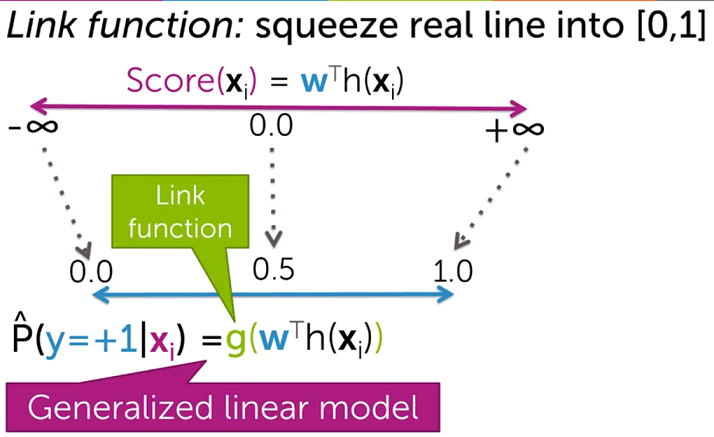

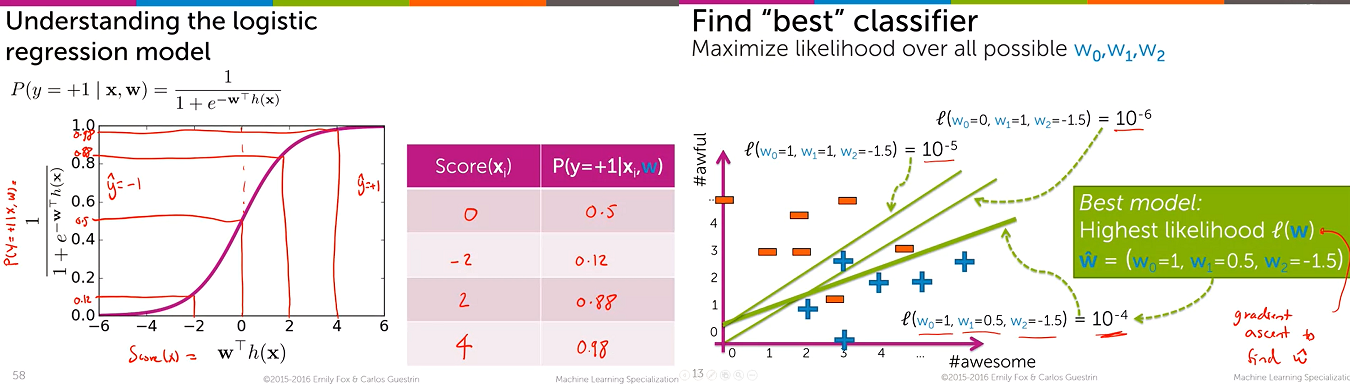

https://www.youtube.com/watch?v=vN5cNN2-HWE

the logit function is the inverse of the logistic function. The **logit is also called the log-odds**

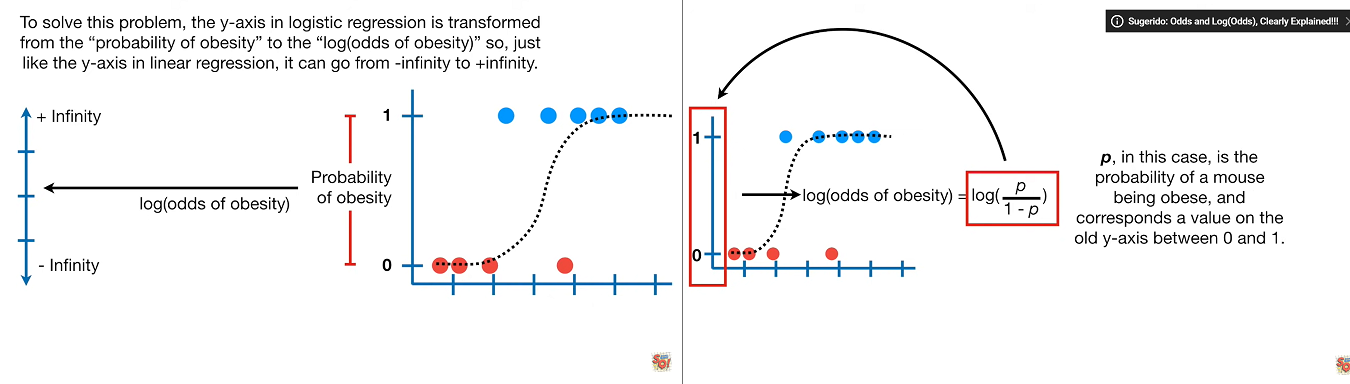

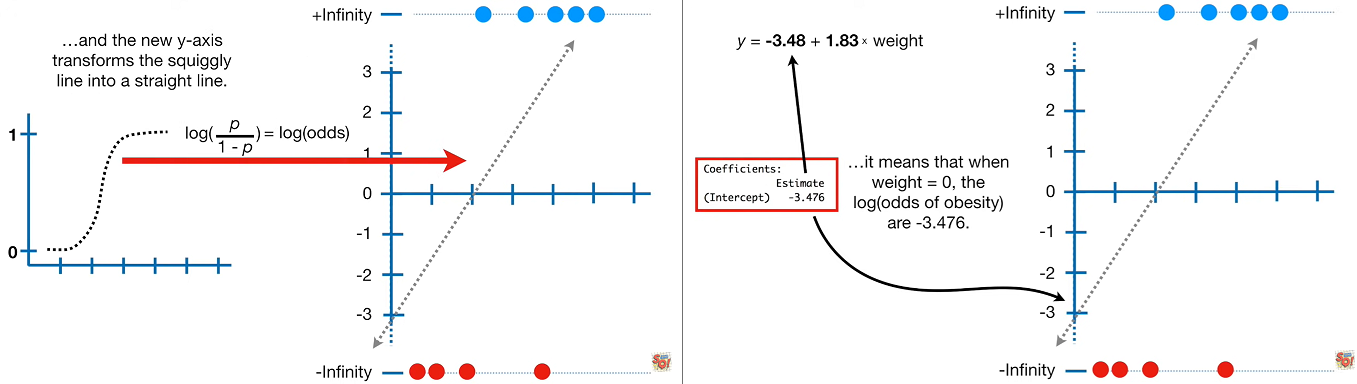

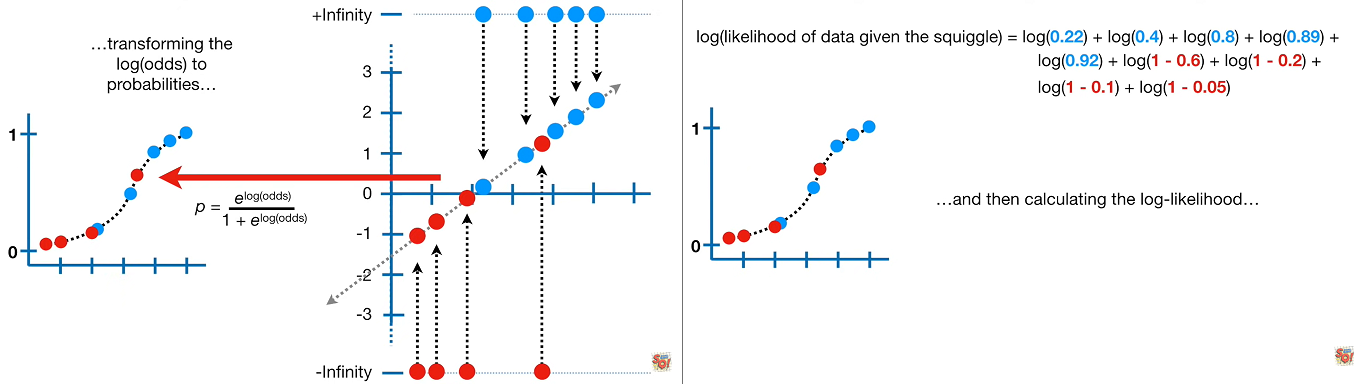

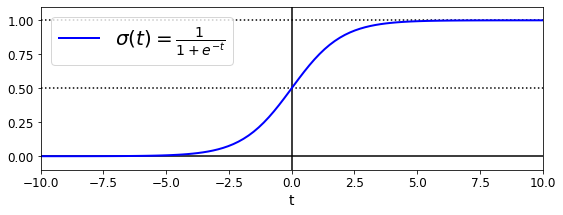

In [ ]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
#save_fig("logistic_function_plot")
plt.show()




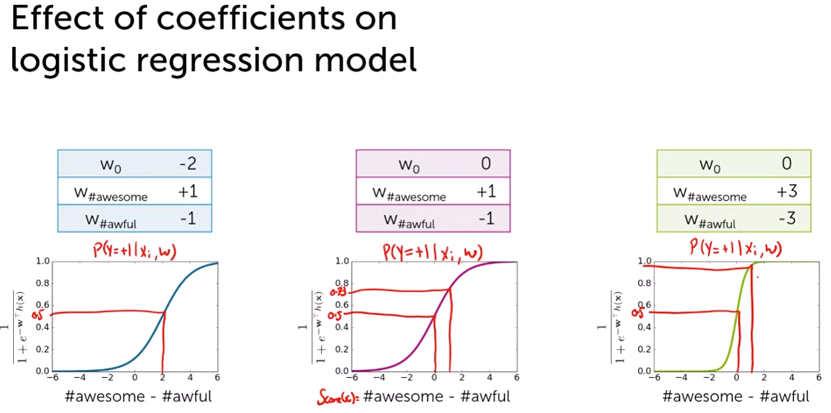

**Overfitting** = **overconfident** and tiny region boundary (tiny uncertainty)

## **Training and Cost Function**

$−log(p)$ if y = 1

$−log(1 − p)$ if y = 0

The coefficients of the logistic regression algorithm must be estimated from your training data. This is done using maximum-likelihood estimation.

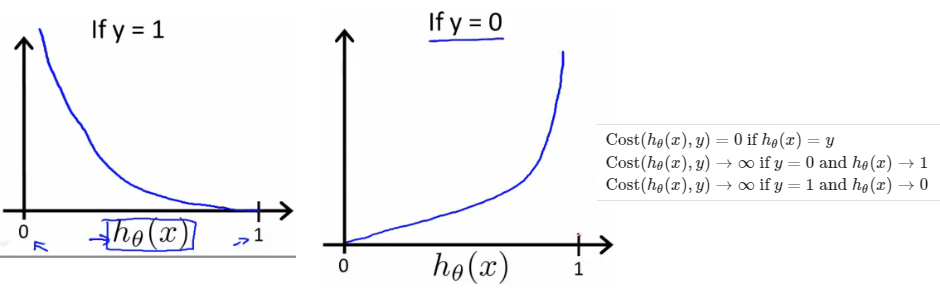

The cost function over the whole training set is simply the average cost over all training instances (log loss)

$J(θ) = −1/m\sum_{i=1}^{m}[y^{(i)}log(p^{i}) + (1 − y^{(i)}) log(1 − p^{(i)})]$

this cost function is **convex**, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum

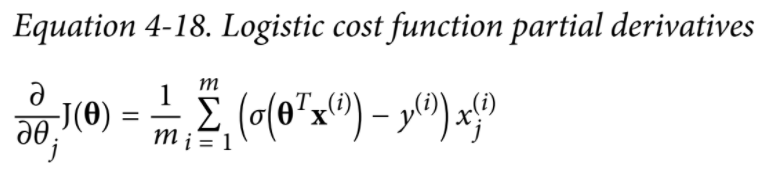

## **Decision Boundaries**

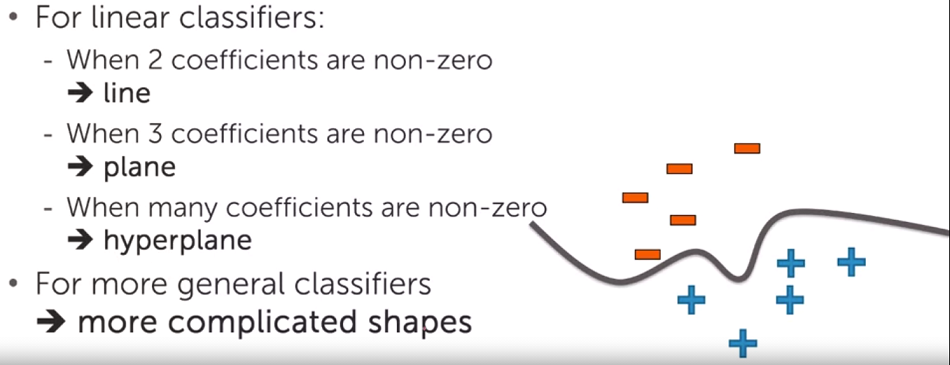

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

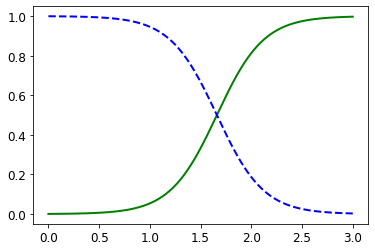

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


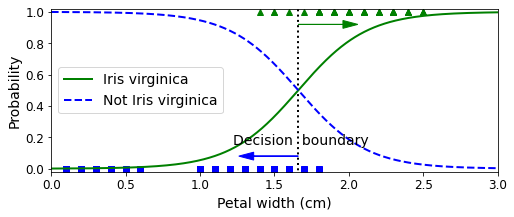

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
#save_fig("logistic_regression_plot")
plt.show()

In [ ]:
X_new

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201],
       [0.01501502],
       [0.01801802],
       [0.02102102],
       [0.02402402],
       [0.02702703],
       [0.03003003],
       [0.03303303],
       [0.03603604],
       [0.03903904],
       [0.04204204],
       [0.04504505],
       [0.04804805],
       [0.05105105],
       [0.05405405],
       [0.05705706],
       [0.06006006],
       [0.06306306],
       [0.06606607],
       [0.06906907],
       [0.07207207],
       [0.07507508],
       [0.07807808],
       [0.08108108],
       [0.08408408],
       [0.08708709],
       [0.09009009],
       [0.09309309],
       [0.0960961 ],
       [0.0990991 ],
       [0.1021021 ],
       [0.10510511],
       [0.10810811],
       [0.11111111],
       [0.11411411],
       [0.11711712],
       [0.12012012],
       [0.12312312],
       [0.12612613],
       [0.12912913],
       [0.13213213],
       [0.13513514],
       [0.13813814],
       [0.141

Notice that there is a bit of overlap. Therefore, there is a decision
boundary at around 1.6 cm where both **probabilities are equal to 50%**:

In [ ]:
decision_boundary

array([1.66066066])

In between these extremes, the classifier is unsure. However, if you ask it to
predict the class (using the predict() method rather than the predict_proba()
method), it will return whichever class is the most likely. **if the petal
width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica, or else it will predict that it is not**

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

The hyperparameter controlling the regularization strength of a
Scikit-Learn LogisticRegression model is not alpha (as in other
linear models), but its inverse: C. **The higher the value of C, the less**
the model is regularized.

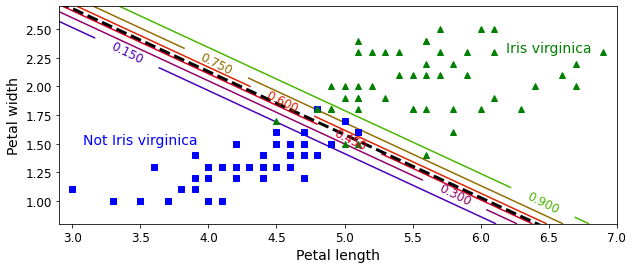

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

The dashed line represents the points where the model estimates a 50% probability: **this is the model’s decision boundary**. Note that it is a linear boundary.


## **Softmax Regression**

* The Logistic Regression model can be generalized to **support multiple classes** directly, without having to train and combine multiple binary classifiers.

* Softmax function computes a score $s_{k}(x)$ for each class k, then estimates the probability of each class by applying the softmax function to the
scores (logit)

$s_{k}(x) = x^{T}θ^{k}$

* Minimizing the cost function, called cross entropy

* The Softmax Regression classifier **predicts only one class at a time**
(i.e., it is multiclass, not multioutput) so it should be used only with **mutually exclusive classes** such as different types of plants. You
cannot use it to recognize multiple people in one picture.

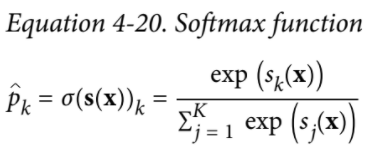

Scikit-Learn’s LogisticRegression uses one-versus-all by default when you train it on morethan two classes, but you can set the **multi_class hyperparameter** to "multinomial" to switch it to Softmax Regression instead.

https://www.youtube.com/watch?v=8ps_JEW42xs

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The objective is to have a model that estimates a high
probability for the target class (and consequently a low probability for the other
classes).
It also applies l2 regularization by default, which you can control using the hyperparameter C.

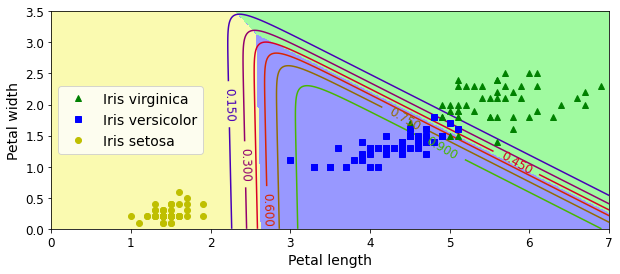

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()

Notice that the decision boundaries between any two classes are linear.

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# **Exercises**

## **1.**

What Linear Regression training algorithm can you use if you have a training set
with millions of features?

Use Gradient Descent (not Normal Equation)

## **2.**

Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?

The model will take a longer time to reach the global maximum. You need to scale the features before training the model.

## **3.**

Can Gradient Descent get stuck in a local minimum when training a Logistic
Regression model?

No, because it is a convex function (only global minimum)

## **4.**

Do all Gradient Descent algorithms lead to the same model provided you let
them run long enough?

No, it depends on learning rate parameter

## **5.**

Suppose you use Batch Gradient Descent and you plot the validation error at
every epoch. If you notice that the validation error consistently goes up, what is
likely going on? How can you fix this?

Reduce the value of learning rate.

## **6.**

Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

No, you need to observe for a long time to make sure that you are not stuck in local minimum

## **7.**

Which Gradient Descent algorithm (among those we discussed) will reach the
vicinity of the optimal solution the fastest? Which will actually converge? How
can you make the others converge as well?

Stochastic Gradient Descent is the fatest.
Batch Gradient Descent will actually converge
To converge, you have to decrease the value of learning rate

## **8.**

Suppose you are using Polynomial Regression. You plot the learning curves and
you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

Overfitting

1. Reduce the complexity (degrees of freedom)

2. Regularized the model

3. Add more data

## **9.**

Suppose you are using Ridge Regression and you notice that the training error
and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

High bias (underfitting). Decrease the regularization hyperparameter

## **10.**

Why would you want to use:
* Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?

A model with some regularization typically performs better than a model without any regularization


* Lasso instead of Ridge Regression?

feature selection


* Elastic Net instead of Lasso?

when several features are strongly correlated or when there are more features than training instances